In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Display first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

# Data Cleaning and Formatting

In [6]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')  
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce') 

In [7]:
# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())



Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
# Merge datasets for detailed analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Exploratory Data Analysis (EDA)

C:\Users\USER\AppData\Local\Temp\ipykernel_25856\1008604774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_dist.index, y=region_dist.values, palette="viridis")


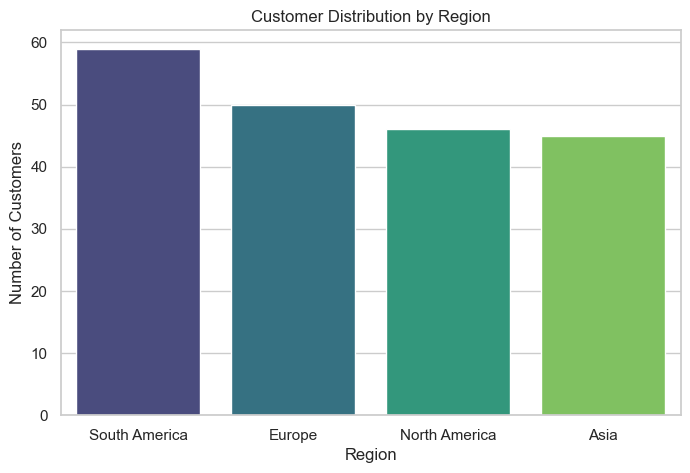

In [9]:
# 1. Customer Distribution by Region
region_dist = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_dist.index, y=region_dist.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_25856\3198025862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="coolwarm")


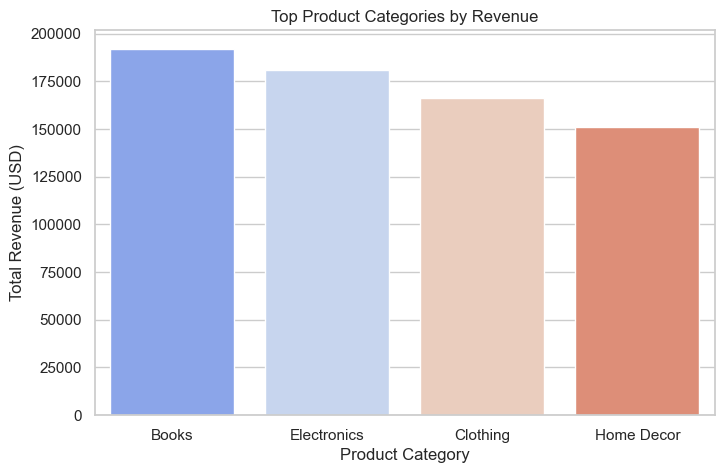

In [10]:
# 2. Top Product Categories by Revenue
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="coolwarm")
plt.title("Top Product Categories by Revenue")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Product Category")
plt.show()

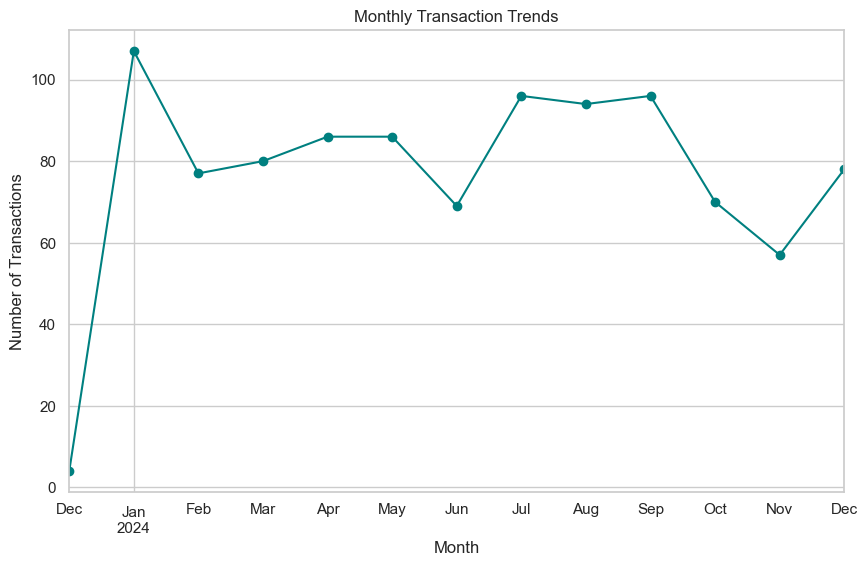

In [11]:
# 3. Monthly Transactions
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period("M")
monthly_transactions = merged_data.groupby('TransactionMonth')['TransactionID'].count()
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Transaction Trends")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_25856\458079476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=customer_spending.index, x=customer_spending.values, palette="magma")


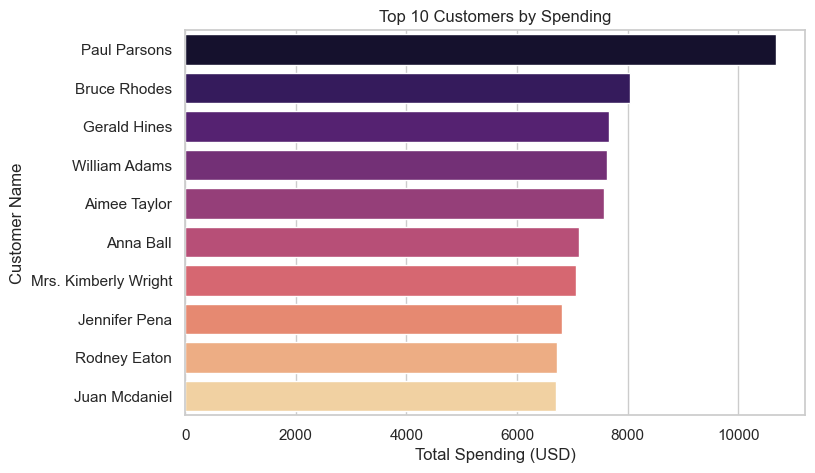

In [12]:
# 4. Top Customers by Spending
customer_spending = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y=customer_spending.index, x=customer_spending.values, palette="magma")
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_25856\4180785046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_products.index, x=popular_products.values, palette="cubehelix")


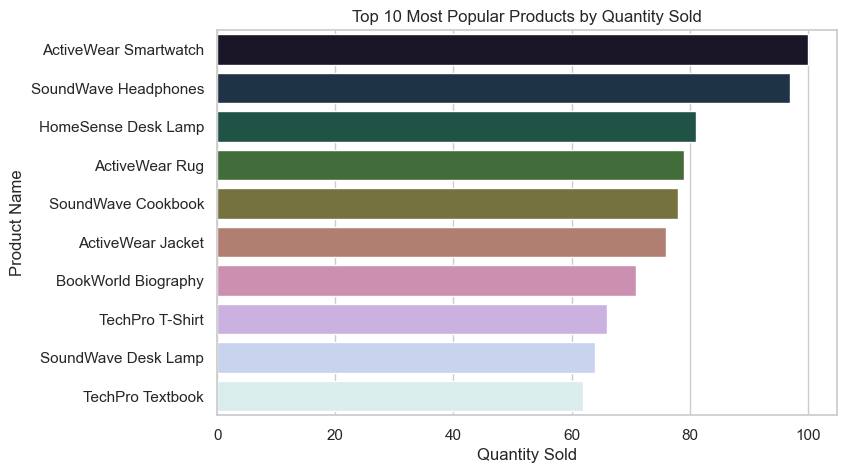

In [13]:
# 5. Most Popular Products
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y=popular_products.index, x=popular_products.values, palette="cubehelix")
plt.title("Top 10 Most Popular Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_25856\3796836105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_region.index, y=avg_revenue_region.values, palette="Spectral")


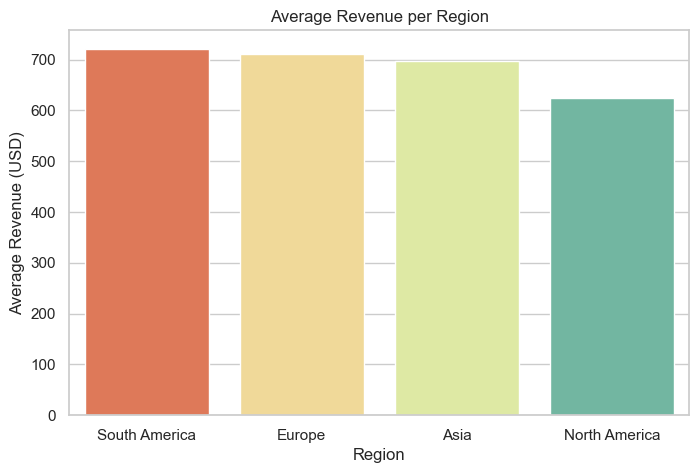

In [14]:
# Additional Insight: Average Revenue per Region
avg_revenue_region = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_revenue_region.index, y=avg_revenue_region.values, palette="Spectral")
plt.title("Average Revenue per Region")
plt.ylabel("Average Revenue (USD)")
plt.xlabel("Region")
plt.show()

In [15]:
# Save merged data for further analysis
merged_data.to_csv("Merged_Data.csv", index=False)

print("EDA Completed: Merged data saved as 'Merged_Data.csv'.")


EDA Completed: Merged data saved as 'Merged_Data.csv'.
